In [51]:
import pandas as pd
data = pd.read_csv('breast_cancer.csv')
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [52]:
X = data.iloc[:,:-1]
y = data.outcome

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\diparoy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9473684210526315


col_0,0,1
outcome,,
0,106,6
1,3,56


In [56]:
model.predict_proba(X_test)[:,1]

array([9.90959971e-01, 4.65544683e-04, 2.16917098e-03, 9.99897024e-01,
       5.25599739e-03, 4.04650111e-02, 6.43398371e-04, 6.95497800e-01,
       9.99998429e-01, 9.45151233e-01, 2.48422746e-04, 3.39927047e-04,
       7.36988902e-01, 1.15542073e-03, 9.99586700e-01, 9.96818277e-01,
       1.96388608e-03, 1.51213886e-01, 3.46727434e-02, 9.65178328e-01,
       8.68220218e-01, 3.14241622e-01, 2.28120705e-02, 2.52778205e-02,
       9.99999999e-01, 9.99999833e-01, 1.97997266e-01, 9.99999990e-01,
       1.40047204e-03, 1.05152578e-01, 1.74706960e-03, 8.19006861e-03,
       1.00000000e+00, 1.51537841e-03, 6.61032705e-02, 1.83457236e-03,
       1.07805007e-02, 8.02895487e-05, 1.73002732e-03, 8.03716548e-03,
       8.06666652e-04, 1.17709119e-03, 1.69229407e-02, 7.34568950e-01,
       8.49345960e-04, 1.00000000e+00, 9.88064113e-01, 9.98127938e-01,
       9.91874386e-01, 1.97086590e-02, 3.65075454e-02, 1.57000464e-02,
       9.99669875e-01, 4.03262411e-03, 1.53350301e-02, 1.00000000e+00,
      

In [57]:
import numpy as np
np.where(model.predict_proba(X_test)[:,1]>.3,1,0)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [58]:
y_pred_th3 = np.where(model.predict_proba(X_test)[:,1]>.3,1,0)
y_pred_th4 = np.where(model.predict_proba(X_test)[:,1]>.4,1,0)

In [59]:
pd.crosstab(y_test,y_pred_th4)

col_0,0,1
outcome,,
0,106,6
1,3,56


In [60]:
pd.crosstab(y_test,y_pred_th3)

col_0,0,1
outcome,,
0,106,6
1,2,57


In [61]:
def predict_threshold(model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [62]:
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):
    y_pred = predict_threshold(model,X_test,thr)
    print('Threshold: ',thr)
    print(confusion_matrix(y_test,y_pred))

Threshold:  0.0
[[  0 112]
 [  0  59]]
Threshold:  0.1
[[100  12]
 [  1  58]]
Threshold:  0.2
[[105   7]
 [  1  58]]
Threshold:  0.30000000000000004
[[106   6]
 [  2  57]]
Threshold:  0.4
[[106   6]
 [  3  56]]
Threshold:  0.5
[[106   6]
 [  3  56]]
Threshold:  0.6000000000000001
[[106   6]
 [  3  56]]
Threshold:  0.7000000000000001
[[107   5]
 [  3  56]]
Threshold:  0.8
[[108   4]
 [  6  53]]
Threshold:  0.9
[[110   2]
 [  7  52]]
Threshold:  1.0
[[112   0]
 [ 59   0]]


In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [68]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.77605464e-01, 9.65178328e-01,
       9.61812678e-01, 9.46293213e-01, 9.45151233e-01, 8.84560582e-01,
       8.68220218e-01, 7.92328061e-01, 7.34568950e-01, 6.95497800e-01,
       3.14241622e-01, 2.74239686e-01, 2.29396288e-01, 7.95304686e-02,
       7.35609116e-02, 1.26407918e-05])

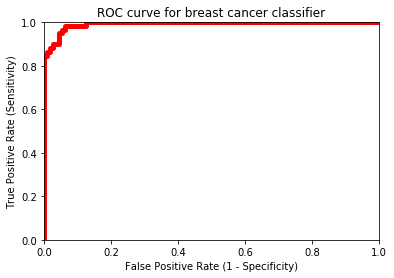

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [72]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.9927360774818402